<h1><center>Deep Learning</center></h1>
<h2><center>Assignment # 3</center></h2>
<h3><center>Task # 1</center></h3>

In [1]:
# Include libraries which may use in implementation
import numpy as np
import scipy.misc as img
import scipy.io
from sklearn.metrics import confusion_matrix
import glob
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

In [2]:
#loading data from a mat file
data = scipy.io.loadmat('filters.mat')
filters = data['filters']
filters = np.array(filters)
print(filters.shape)
(filter_dim1,filter_dim2,total_filters) = filters.shape

(17, 17, 36)


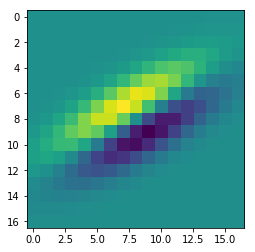

In [3]:
plt.imshow(np.reshape(filters[:,:,5],(17, 17)))
plt.show()

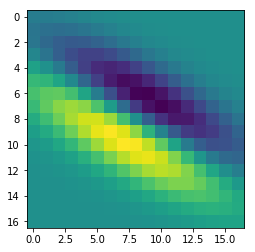

In [42]:
plt.imshow(np.reshape(filters[:,:,7],(17, 17)))
plt.show()

In [4]:
def conv_forward(img, filters, stride=1, pad=0):
    
    (image_height, image_width) = img.shape
    (filter_height,filter_width,total_filters) = filters.shape
    output_volume = int((image_height - filter_height + 2*pad)/stride)+1 
    convolved_output = np.zeros((output_volume,output_volume,total_filters))

    for filter_no in range(total_filters):
        input_dim1 = 0
        for output_dim1 in range(output_volume):
            input_dim2 = 0
            for output_dim2 in range(output_volume):
                f=filters[:,:,filter_no]
                #print(f.shape)
                #k=img[input_dim1:input_dim1+filter_height, input_dim2:input_dim2+filter_height]
                #print(k.shape)
                c= f*img[input_dim1:input_dim1+filter_height, input_dim2:input_dim2+filter_height]
                convolved_output[output_dim1,output_dim2,filter_no] = np.sum(c)
                input_dim2+=stride
            input_dim1+=stride 
                
    return convolved_output


In [5]:
def pool_forward(feature_map, mode = 'max', filter_size=2, stride=2):
    height, width, no_of_channels = feature_map.shape
    width_new = int((width - filter_size)/stride)+1
    height_new = int((height - filter_size)/stride)+1
    pooled_output = np.zeros((height_new, width_new,no_of_channels))
    for channel in range(no_of_channels):
            input_dim1 = 0
            for output_dim1 in range(height_new):
                input_dim2 = 0
                for output_dim2 in range(width_new):
                    pooled_output[output_dim1, output_dim2,channel]= np.max(feature_map[input_dim1:input_dim1+filter_size,input_dim2:input_dim2+filter_size,channel])
                    input_dim2+=stride
                input_dim1+=stride 
    return pooled_output
                    

In [6]:
def relu(s):
    return np.maximum(0, s)

<h1>Loading Train and Test Data of MNIST</h1>

In [7]:
def load_dataset(path):
    print('Loading Dataset...')
    train_x =[]
    train_y =[]
    test_x  =[]
    test_y  =[]
    for i in range(10):
        for filename in glob.glob(path+'\\train\\'+str(i) +'\\*.png'):
            im = img.imread(filename)
            train_x.append(im)
            train_y.append(i)
    
    for i in range(10):
        for filename in glob.glob(path+'\\test\\'+str(i) +'\\*.png'):
            im = img.imread(filename)
            test_x.append(im)
            test_y.append(i)
            
    print('Dataset Loaded...')
    return np.array(train_x),np.array(train_y),np.array(test_x),np.array(test_y)

In [8]:
path_ = 'C:\\Users\\hp\\DL Assignments\\assignment3\\New folder\\Task1_Data'
train_set_x, train_set_y, test_set_x, test_set_y = load_dataset(path_)

Loading Dataset...


c:\python36\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':
c:\python36\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  from ipykernel import kernelapp as app


Dataset Loaded...


In [46]:
#Test Data
test_x = test_set_x.reshape((test_set_x.shape[0], 28 * 28))
t_dataX = test_x - np.mean(test_x)
t_dataX /= np.std(t_dataX)
t_dataY = test_set_y
#t_dataY = t_dataY.reshape(10000,1)
#test = np.hstack((t_dataX,t_dataY))
#print(test.shape)
#np.random.shuffle(test)
#t_subset = test[:100]
#t_subset.shape

In [47]:
train_x = train_set_x.reshape((train_set_x.shape[0], 28 * 28))
dataX = train_x - np.mean(train_x)
dataX /= np.std(dataX)
dataY = train_set_y
#dataY = dataY.reshape(60000,1)

<h1>Convolution and Max-pooling on Train and Test Data of MNIST</h1>

(1296,)


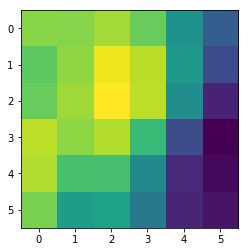

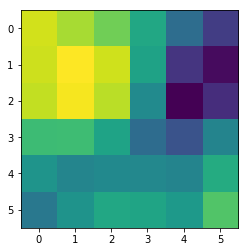

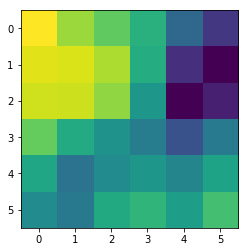

In [55]:
conv_train=np.empty(shape=(len(dataX),1296))
for i in range(len(dataX)):
    image=dataX[i]
    image = image.reshape(28,28)
    feature_map=conv_forward(image,filters)
    pooled_output=pool_forward(feature_map)
    features=pooled_output.flatten()
    #print(features.shape)
    conv_train[i]=features
    #break

In [58]:
np.save('train_conv',conv_train)

In [11]:
conv_train = np.load('train_conv.npy')

In [59]:
conv_test=np.empty(shape=(len(t_dataX),1296))
for i in range(len(t_dataX)):
    image=t_dataX[i]
    image = image.reshape(28,28)
    feature_map=conv_forward(image,filters)
    pooled_output=pool_forward(feature_map)
    features=pooled_output.flatten()
    #print(features.shape)
    conv_test[i]=features
    #break

In [60]:
np.save('test_conv',conv_test)

In [12]:
conv_test = np.load('test_conv.npy')

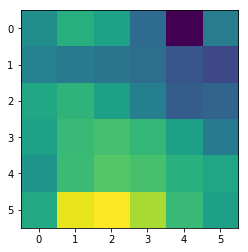

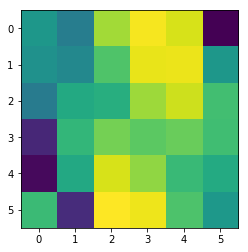

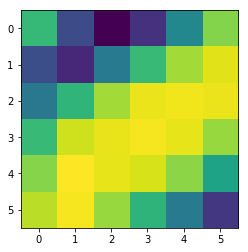

In [13]:
# VIEWING RESULT OF CONVOLUTION
first_image_features = conv_train[1]
first_image_features = first_image_features.reshape([1296,1])
image = first_image_features.reshape([6,6,36])
plt.imshow(image[:,:,1])
plt.show()
plt.imshow(image[:,:,20])
plt.show()
plt.imshow(image[:,:,35])
plt.show()



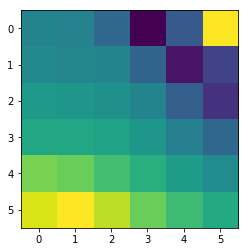

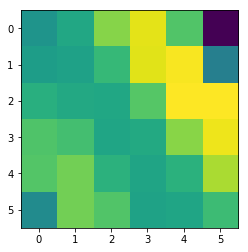

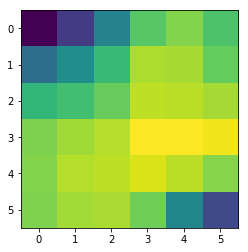

In [62]:
first_image_features = conv_test[1]
first_image_features = first_image_features.reshape([1296,1])
image = first_image_features.reshape([6,6,36])
plt.imshow(image[:,:,1])
plt.show()
plt.imshow(image[:,:,20])
plt.show()
plt.imshow(image[:,:,35])
plt.show()

<h1>Applying ReLU Activation after Convolution</h1>

In [75]:
conv_train_relu = np.empty(shape=(len(dataX),1296))
#print(len(conv_train))
#k = conv_train[0]
#print(k.shape)
#r = relu(k)
#print(r.shape)

for i in range(len(dataX)):
    k = conv_train[i]
    #print(k.shape)
    r = relu(k)
    #print(r.shape)
    break
    conv_train_relu[i] = r
np.save('train_conv_relu',conv_train_relu)

conv_test_relu = np.empty(shape=(len(t_dataX),1296))
for i in range(len(t_dataX)):
    k = conv_test[i]
    #print(k.shape)
    r = relu(k)
    #print(r.shape)
    conv_test_relu[i] = r
np.save('test_conv_relu',conv_test_relu)    

In [14]:
conv_train_relu = np.load('train_conv_relu.npy')
conv_test_relu = np.load('test_conv_relu.npy')

<h1>Fully Connected Neural Network</h1>

In [40]:
# Create a Neural_Network class
class Neural_Network(object):  
    def __init__(self,no_of_layers = 2,input_dim=784,neurons_per_layer = [128,64,10], activation = 'sigmoid'):
        self.activation = activation
        self.total_no_of_layers = no_of_layers + 1 + 1# +1 for input layer, +1 for output_layer
        self.neurons_per_layer = [input_dim] + neurons_per_layer # inserting input layer neurons for easier processing
        self.no_of_classes = self.neurons_per_layer[-1] #saving no_of_classes for later use
        self.weights = []
        self.biases = []
        for i in range(len(self.neurons_per_layer)-1):
            weights=np.random.randn(self.neurons_per_layer[i+1],self.neurons_per_layer[i])#/np.sqrt(self.neurons_per_layer[i])#*0.25 #one weight vector for every neuron
            #print('weights.shape')
            #print(weights.shape)
            biases = np.random.randn(self.neurons_per_layer[i+1],1)# *0.25
            #print('biases.shape')
            #print(biases.shape)
            self.weights.append(weights)
            self.biases.append(biases)


    def sigmoid(self, s):
        # activation function
        return (1/(1+np.exp(-s))) #? # apply sigmoid function on s and return it's value

    def sigmoid_derivative(self, s):
        #derivative of sigmoid
        return self.sigmoid(s)*(1-self.sigmoid(s)) #? # apply derivative of sigmoid on s and return it's value 
    
    def tanh(self, s):
        # activation function
        return np.tanh(s) #? # apply tanh function on s and return it's value

    def tanh_derivative(self, s):
        #derivative of tanh
        return (1-(self.tanh(s))**2) #? # apply derivative of tanh on s and return it's value
    
    def relu(self, s):
        return np.maximum(0, s)
    
    def relu_derivative(self, s):
        s[s<=0] = 0
        s[s>0] = 1
        return s
    
    def leaky_relu(self, s):
        s[s < 0] *= .01
        return s

    def leaky_relu_derivative(self, s):
        s[s < 0] *= .01
        s[s > 0] = (int)(1)
        return s

    def softmax(self, output):
        return (np.exp(output))/(np.sum(np.exp(output),axis=0)) 
    
    def feedforward(self, x): 
        x = x.reshape(x.shape[0],1)
        layer_wise_z = [] # z = wx+b # for all layers
        layer_wise_dz = []
        layer_wise_a = [] # inputs of all layers
        layer_input = x
        layer_wise_a.append(x) # first input is input data itself, saving for later use

        for weights,biases in zip(self.weights, self.biases):
            z = np.dot(weights, layer_input)+biases
            layer_wise_z.append(z)
            if self.activation == 'sigmoid':
                layer_input = self.sigmoid(z)
            elif self.activation == 'tanh':
                layer_input = self.tanh(z)
            else:
                print("unknown activation function")
            #layer_input = self.relu(z)
            layer_wise_a.append(layer_input)
        
        return layer_wise_z,layer_wise_a
    

    def backpropagation(self,z,a,x,y):
        one_hot_y = y
        layer_wise_z = z
        layer_wise_a = a
        # softmax on last layer's output
        layer_wise_a[-1] = self.softmax(layer_wise_a[-1])
        # empty arrays for weights and biases gradients initialized with zero.
        layer_wise_dw = [np.zeros(weight.shape) for weight in self.weights]
        layer_wise_db = [np.zeros(bias.shape) for bias in self.biases]
        # gradients at output layer
        dz = (layer_wise_a[-1]- one_hot_y)# * self.sigmoid_derivative(layer_wise_z[-1])
        layer_wise_dw[-1] = np.dot(dz, layer_wise_a[-2].T)
        layer_wise_db[-1] = dz
        # gradients at hidden layers
        for index in range(2, self.total_no_of_layers): # starting from 2, cuz I want -2, filling the array in rever order
            z_ = layer_wise_z[-index]                    # -1 index has been filled above with output layer gradients
            a_ = layer_wise_a[-index]
            if self.activation == 'sigmoid':
                #derivative = self.sigmoid_derivative(z_)
                derivative = self.sigmoid_derivative(a_)
            elif self.activation == 'tanh':
                #derivative = self.tanh_derivative(z_)
                derivative = self.tanh_derivative(a_)
            else:
                print("unknown activation function")
            dz = np.dot(self.weights[-index+1].T, dz) * derivative 
            #dz[a_<=0] = 0 
            layer_wise_dw[-index] = np.dot(dz, layer_wise_a[-index-1].T) 
            layer_wise_db[-index] = dz 
        return layer_wise_dw, layer_wise_db
    
    def sgd(self,dw,db,learningRate):
        #self.weights = [old_w-(learningRate)*new_w for new_w, old_w in zip(dw,self.weights)]
        #self.biases =  [old_b-(learningRate)*new_b for new_b, old_b in zip(db,self.biases)]
        
        #beta = 0.95
        
        #layer_wise_mom_w = [np.zeros(weight.shape) for weight in self.weights]
        #layer_wise_mom_b = [np.zeros(bias.shape) for bias in self.biases]
        
       #layer_wise_mom_w = [beta*old_mom + (1 - beta)*grad for grad, old_mom in zip(dw,layer_wise_mom_w)]
        #layer_wise_mom_b = [beta*old_mom + (1 - beta)*grad for grad, old_mom in zip(db,layer_wise_mom_b)]
        
        #self.weights = [old_w-((learningRate))*new_w for new_w, old_w in zip(layer_wise_mom_w,self.weights)]
        #self.biases = [old_b-((learningRate))*new_b for new_b, old_b in zip(layer_wise_mom_b,self.biases)]
        
        beta1 = 0.95
        beta2 = 0.99
        
        layer_wise_s_w = [np.zeros(weight.shape) for weight in self.weights]
        layer_wise_v_w = [np.zeros(weight.shape) for weight in self.weights]
        
        layer_wise_s_b = [np.zeros(bias.shape) for bias in self.biases]
        layer_wise_v_b = [np.zeros(bias.shape) for bias in self.biases]
        
        layer_wise_v_w = [beta1*old_mom + (1 - beta1)*grad for grad, old_mom in zip(dw,layer_wise_v_w)]
        layer_wise_s_w = [beta2*old_mom + (1 - beta2)* ((grad)**2) for grad, old_mom in zip(dw,layer_wise_s_w)]
        self.weights = [old_w-((learningRate))*(new_w/np.sqrt(new_w+1e-7)) for new_w, old_w in zip(layer_wise_s_w,self.weights)]
        
        layer_wise_v_b = [beta1*old_mom + (1 - beta1)*grad for grad, old_mom in zip(db,layer_wise_v_b)]
        layer_wise_s_b = [beta2*old_mom + (1 - beta2)* ((grad)**2) for grad, old_mom in zip(db,layer_wise_s_b)]
        self.biases = [old_b-((learningRate))*new_b/np.sqrt(new_b+1e-7) for new_b, old_b in zip(layer_wise_s_b,self.biases)]
                       
    def train(self,train_set_x,train_set_y, learning_rate, training_epochs,model_name,
                  plot_err = True ,validationX = 'NULL', validationY = 'NULL'):
        Loss =[]
        Train_Accuracy= []
        Valid_Accuracy= []
        epochs_list=[]
        #sample_numbers = np.random.permutation(len(train_set_x))
        #iterations = len(train_set_x)
        for epoch in range(training_epochs):
            name = model_name + str(epoch) + '.mdl'
            epochs_list.append(epoch)
            loss_in_epoch = 0
            for i in range(len(train_set_x)):
                x = train_set_x[i]
                y = train_set_y[i]
                #print(y)
                one_hot_y = self.onehotencoder(y)
                #print(one_hot_y)
                #return
                z,a= self.feedforward(x)
                dw,db=self.backpropagation(z,a,x,one_hot_y)
                loss = self.cross_entropy_loss(one_hot_y, self.softmax(a[-1]))
                loss_in_epoch = loss_in_epoch + loss
                self.sgd(dw,db, learning_rate)
            
            self.saveModel(name)
            loss_in_epoch = loss_in_epoch/len(train_set_x)
            print("At epoch ",epoch, "loss is: ", loss_in_epoch)
            Loss.append(loss_in_epoch)
  
            ### calculating accuracy ###
            print("Extracting Accuracies")
            train_accuracy = self.accuracy(train_set_x,train_set_y)
            Train_Accuracy.append(train_accuracy)
            #print("At epoch ",epoch, "loss is: ", loss, "training accuracy is: ", train_accuracy)
            print("At epoch ",epoch, "training accuracy is: ", train_accuracy)
            # if validation data is not null than show validation accuracy and error of the model.
            if validationX != 'NULL':
                valid_accuracy = self.accuracy(validationX,validationY)
                print("At epoch ",epoch, "validation accuracy is ", valid_accuracy)
                Valid_Accuracy.append(valid_accuracy)
            
        if plot_err:
            plt.plot(epochs_list,Loss,'bo')
            plt.xlabel('epoch number')
            plt.ylabel('Cross Entropy loss')
            plt.show()
            plt.plot(epochs_list,Train_Accuracy)
            plt.xlabel('epoch number')
            plt.ylabel('Training Accuracy')
            plt.show()
            if validationX != 'NULL':
                plt.plot(epochs_list,Valid_Accuracy)
                plt.xlabel('epoch number')
                plt.ylabel('Validation Accuracy')
                plt.show()  
                
    def onehotencoder(self, y):
        one_hot_y = np.zeros((self.no_of_classes,1)) 
        #print(y)
        one_hot_y[int(y)] = 1.0 
        return one_hot_y
    
    def cross_entropy_loss(self,actual_Y, predicted_Y):
        return -np.sum(actual_Y * np.log(predicted_Y))
        
    def predict(self,image):
        z,a = self.feedforward(image)
        softmax_output = self.softmax(a[-1])
        return np.argmax(softmax_output)
    
    
    def accuracy(self,datax,datay, test = False):
            tp = 0
            actual_labels = []
            predicted_labels = []

            for i in range(len(datax)):
                actual_labels.append(int(datay[i]))
                image = datax[i]
                pred = self.predict(image)
                predicted_labels.append(pred)
                if pred==datay[i]:
                    tp+=1
                
            accuracy = float(tp/len(datax)*100)
            cnf_mat = confusion_matrix(actual_labels, predicted_labels)
            print(cnf_mat)
            if test:
                bar_label = ['Testing Accuracy']
                bar_index = np.arange(len(bar_label))
                plt.bar(bar_index,accuracy)
                #plt.xlabel('Testing')
                #plt.ylabel('Accuracy')
                plt.xticks(bar_index, bar_label, fontsize=10, rotation=0)
                plt.show()
            
            return accuracy
  
    
    def saveModel(self,name):
        pickle.dump(self, open(name, 'wb'))
        
    def loadModel(self,name):
        return pickle.load(open(name, 'rb'))

<h1>Passing Convolution Features through Fully Connected Network</h1>

<h1>First Experiment</h1>

In [26]:
train_input=conv_train.reshape((conv_train.shape[0], 1296))
test_input=conv_test.reshape((conv_test.shape[0], 1296))
print(train_input.shape) #should be (60000,1296)
print(test_input.shape) #should be (10000,1296)

(60000, 1296)
(10000, 1296)


In [27]:
dataX = train_input
dataY = train_set_y
dataY = dataY.reshape(60000,1)
td = np.hstack((dataX,dataY))
print(td.shape)
np.random.shuffle(td)
subset = td[:500]
print(subset.shape)
np.random.shuffle(subset)
datax = subset[:,0:-1]
datay = subset[:,-1]
print(datax.shape)
print(datay.shape)

(60000, 1297)
(500, 1297)
(500, 1296)
(500,)


In [30]:
model1 = Neural_Network(2,1296,[256,128,10], 'sigmoid')
model1.saveModel('task1_model1_bestmodel.mdl')

At epoch  0 loss is:  2.3058870650244727
Extracting Accuracies
[[ 0  2  1  0  0  6  0  0  2 40]
 [ 0  0  0  0  0  1  0  1  0 56]
 [ 0  0  0  0  0  4  0  3  0 41]
 [ 0  0  1  0  0  3  0  6  0 34]
 [ 0  1  6  0  0 12  0  1  1 27]
 [ 0  0  0  0  0 11  0  9  1 20]
 [ 0  8  0  0  0 10  0  2  3 18]
 [ 0  1  0  0  0 11  0  1  2 41]
 [ 0  0  0  0  0  5  0  9  1 46]
 [ 0  2  1  0  0 14  0  4  1 30]]
At epoch  0 training accuracy is:  8.6
At epoch  1 loss is:  2.3090242272877153
Extracting Accuracies
[[ 0  2  1  0  0  4  0  0  5 39]
 [ 0  0  0  0  0  4  0  3  0 51]
 [ 0  1  0  0  0  3  0  8  0 36]
 [ 0  0  1  0  0  5  0  5  1 32]
 [ 0  2  4  0  0 16  1  4  4 17]
 [ 0  1  0  0  0  8  0 11  0 21]
 [ 0  8  0  0  0 10  0  5  5 13]
 [ 0  1  0  0  0 14  0  0  2 39]
 [ 0  1  0  0  0 12  1 10  2 35]
 [ 1  3  0  0  0 20  0  4  1 23]]
At epoch  1 training accuracy is:  6.6000000000000005
At epoch  2 loss is:  2.3087853317811398
Extracting Accuracies
[[ 0  0  1  0  0  2  0  2  4 42]
 [ 0  0  0  0  0  1  0 

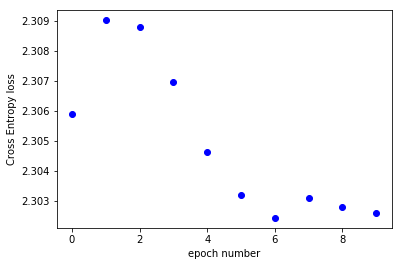

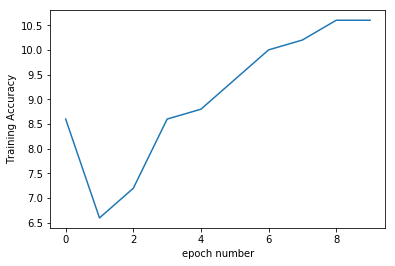

In [31]:
lr = 0.009
epochs = 10
model1.train(datax,datay,learning_rate = lr, training_epochs=epochs,
            model_name = 'task1_model1_epoch', plot_err = True , validationX = 'NULL', validationY = 'NULL')

At epoch  0 loss is:  2.302602002779183
Extracting Accuracies
[[ 0  0  0  0  0  0  0  0  0 51]
 [ 0  0  0  0  0  0  0  0  0 58]
 [ 0  0  0  0  0  0  0  0  0 48]
 [ 0  0  0  0  0  0  0  0  0 44]
 [ 0  0  0  0  0  0  0  0  0 48]
 [ 0  0  0  0  0  0  0  0  0 41]
 [ 0  0  0  0  0  0  0  0  0 41]
 [ 0  0  0  0  0  0  0  0  0 56]
 [ 0  0  0  0  0  1  0  0  0 60]
 [ 0  0  0  0  0  0  0  0  0 52]]
At epoch  0 training accuracy is:  10.4
At epoch  1 loss is:  2.3025864244366914
Extracting Accuracies
[[ 0  0  0  0  0  0  0  0  0 51]
 [ 0  0  0  0  0  0  0  0  0 58]
 [ 0  0  0  0  0  0  0  0  0 48]
 [ 0  0  0  0  0  0  0  0  0 44]
 [ 0  0  0  0  0  0  0  0  0 48]
 [ 0  0  0  0  0  0  0  0  0 41]
 [ 0  0  0  0  0  0  0  0  0 41]
 [ 0  0  0  0  0  0  0  0  0 56]
 [ 0  0  0  0  0  1  0  0  0 60]
 [ 0  0  0  0  0  0  0  0  0 52]]
At epoch  1 training accuracy is:  10.4
At epoch  2 loss is:  2.302585526989768
Extracting Accuracies


c:\python36\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


[[ 0  0  0  0  0  0  0  0  0 51]
 [ 0  0  0  0  0  0  0  0  0 58]
 [ 0  0  0  0  0  0  0  0  0 48]
 [ 0  0  0  0  0  0  0  0  0 44]
 [ 0  0  0  0  0  0  0  0  0 48]
 [ 0  0  0  0  0  0  0  0  0 41]
 [ 0  0  0  0  0  0  0  0  0 41]
 [ 0  0  0  0  0  0  0  0  0 56]
 [ 0  1  0  0  0  0  0  0  0 60]
 [ 0  0  0  0  0  0  0  0  0 52]]
At epoch  2 training accuracy is:  10.4
At epoch  3 loss is:  2.3025853113812538
Extracting Accuracies
[[ 0 51  0  0  0  0  0  0  0  0]
 [ 0 58  0  0  0  0  0  0  0  0]
 [ 0 48  0  0  0  0  0  0  0  0]
 [ 0 44  0  0  0  0  0  0  0  0]
 [ 0 48  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0  0]
 [ 0 56  0  0  0  0  0  0  0  0]
 [ 0 61  0  0  0  0  0  0  0  0]
 [ 0 52  0  0  0  0  0  0  0  0]]
At epoch  3 training accuracy is:  11.600000000000001
At epoch  4 loss is:  2.30258475784429
Extracting Accuracies
[[ 0 51  0  0  0  0  0  0  0  0]
 [ 0 58  0  0  0  0  0  0  0  0]
 [ 0 48  0  0  0  0  0  0  0  0]
 [ 0 44  0  0  0  0  

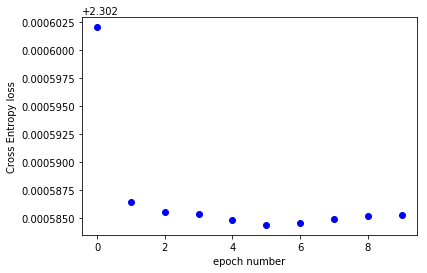

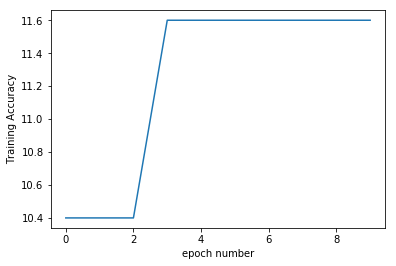

In [33]:
lr = 0.09
epochs = 10
model1.train(datax,datay,learning_rate = lr, training_epochs=epochs,
            model_name = 'task1_model1_epoch', plot_err = True , validationX = 'NULL', validationY = 'NULL')

c:\python36\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


At epoch  0 loss is:  2.302585162159918
Extracting Accuracies
[[ 0  0  0  0  0 51  0  0  0  0]
 [ 0  0  0  0  0 58  0  0  0  0]
 [ 0  0  0  0  0 48  0  0  0  0]
 [ 0  0  0  0  0 44  0  0  0  0]
 [ 0  0  0  0  0 48  0  0  0  0]
 [ 0  0  0  0  0 41  0  0  0  0]
 [ 0  0  0  0  0 41  0  0  0  0]
 [ 0  0  0  0  0 56  0  0  0  0]
 [ 0  0  0  0  0 61  0  0  0  0]
 [ 0  0  0  0  0 52  0  0  0  0]]
At epoch  0 training accuracy is:  8.200000000000001
At epoch  1 loss is:  2.302585093086204
Extracting Accuracies
[[ 0  0  0  0  0 51  0  0  0  0]
 [ 0  0  0  0  0 58  0  0  0  0]
 [ 0  0  0  0  0 48  0  0  0  0]
 [ 0  0  0  0  0 44  0  0  0  0]
 [ 0  0  0  0  0 48  0  0  0  0]
 [ 0  0  0  0  0 41  0  0  0  0]
 [ 0  0  0  0  0 41  0  0  0  0]
 [ 0  0  0  0  0 56  0  0  0  0]
 [ 0  0  0  0  0 61  0  0  0  0]
 [ 0  0  0  0  0 52  0  0  0  0]]
At epoch  1 training accuracy is:  8.200000000000001
At epoch  2 loss is:  2.302585092994114
Extracting Accuracies
[[ 0  0  0  0  0 51  0  0  0  0]
 [ 0  0  0  0

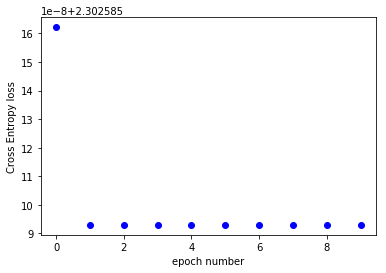

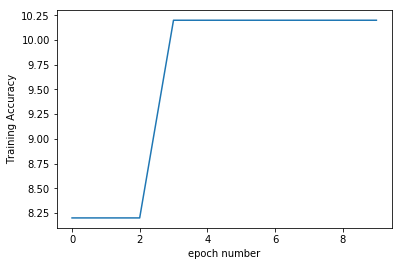

In [34]:
lr = 0.9
epochs = 10
model1.train(datax,datay,learning_rate = lr, training_epochs=epochs,
            model_name = 'task1_model1_epoch', plot_err = True , validationX = 'NULL', validationY = 'NULL')

In [41]:
model2 = Neural_Network(2,1296,[256,128,10], 'sigmoid')
model2.saveModel('task1_model1_bestmodel.mdl')
lr = 0.9
epochs = 10
model2.train(datax,datay,learning_rate = lr, training_epochs=epochs,
            model_name = 'task1_model2_epoch', plot_err = True , validationX = 'NULL', validationY = 'NULL')

c:\python36\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


At epoch  0 loss is:  2.302668086804721
Extracting Accuracies
[[ 0  0  0  0  0 51  0  0  0  0]
 [ 0  0  0  0  0 58  0  0  0  0]
 [ 0  0  0  0  0 48  0  0  0  0]
 [ 0  0  0  0  0 44  0  0  0  0]
 [ 0  0  0  0  0 48  0  0  0  0]
 [ 0  0  0  0  0 41  0  0  0  0]
 [ 0  0  0  0  0 41  0  0  0  0]
 [ 0  0  0  0  0 56  0  0  0  0]
 [ 1  0  0  0  0 60  0  0  0  0]
 [ 0  0  0  0  0 52  0  0  0  0]]
At epoch  0 training accuracy is:  8.200000000000001
At epoch  1 loss is:  2.3025858668065995
Extracting Accuracies
[[ 0  0  0  0  0 51  0  0  0  0]
 [ 0  0  0  0  0 58  0  0  0  0]
 [ 0  0  0  0  0 48  0  0  0  0]
 [ 0  0  0  0  0 44  0  0  0  0]
 [ 0  0  0  0  0 48  0  0  0  0]
 [ 0  0  0  0  0 41  0  0  0  0]
 [ 0  0  0  0  0 41  0  0  0  0]
 [ 0  0  0  0  0 56  0  0  0  0]
 [ 0  0  0  0  0 61  0  0  0  0]
 [ 0  0  0  0  0 52  0  0  0  0]]
At epoch  1 training accuracy is:  8.200000000000001
At epoch  2 loss is:  2.302585093572092
Extracting Accuracies
[[ 0  0  0  0  0 51  0  0  0  0]
 [ 0  0  0  

KeyboardInterrupt: 